In [1]:
import seaborn as sb

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
df = sb.load_dataset('diamonds')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# Create a DF from x,y,z

In [5]:
data = df.copy()

In [6]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [7]:
data.drop(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price'],axis=1, inplace=True)
data.head()

,x,y,z
0,3.95,3.98,2.43
1,3.89,3.84,2.31
2,4.05,4.07,2.31
3,4.20,4.23,2.63
4,4.34,4.35,2.75


Run KMeans on DF

In [8]:
from sklearn.cluster import KMeans

In [9]:
kmeans = KMeans(n_clusters=3, random_state=47)

In [10]:
kmeans.fit(data)

KMeans(n_clusters=3, random_state=47)

In [11]:
clusters = kmeans.predict(data)

In [12]:
kmeans.cluster_centers_

array([[6.2319218 , 6.23147171, 3.85143748],
       [4.69706397, 4.70594242, 2.89948436],
       [7.57013217, 7.56676309, 4.6671783 ]])

Add the lables column to the DF

In [13]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [14]:
data['clusters'] = clusters

In [15]:
data.head()

,x,y,z,clusters
0,3.95,3.98,2.43,1
1,3.89,3.84,2.31,1
2,4.05,4.07,2.31,1
3,4.20,4.23,2.63,1
4,4.34,4.35,2.75,1


Run KNN on new DF - check your score of the clustering

In [16]:
data1 = df.copy()
data1.drop(['x', 'y', 'z'],axis=1, inplace=True)
data1.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335


In [17]:
data1['clusters']=data['clusters']
data1.head()

,carat,cut,color,clarity,depth,table,price,clusters
0,0.23,Ideal,E,SI2,61.5,55.0,326,1
1,0.21,Premium,E,SI1,59.8,61.0,326,1
2,0.23,Good,E,VS1,56.9,65.0,327,1
3,0.29,Premium,I,VS2,62.4,58.0,334,1
4,0.31,Good,J,SI2,63.3,58.0,335,1


In [18]:
X = data.loc[:, data.columns != 'clusters']
y = data.loc[:, data.columns == 'clusters']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=47)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
for i in range (1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_test, y_test)
    y_pred = knn.predict(X_test)
    score = knn.score(X_test, y_test)
    print(i, score)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


1 1.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


2 0.9991011740913431


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


3 0.9992135273299253


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


4 0.9992135273299253


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


5 0.9994382338070895


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


6 0.9994382338070895


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


7 0.9993258805685074


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


8 0.9994944104263805


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


9 0.9992135273299253


Replace x,y,z in the original DF with the cluster and check 

# Model 1

In [21]:
data_igal_1 = df.copy()

In [22]:
data_igal_1.drop(['cut', 'color', 'clarity'],axis=1,inplace=True)
data_igal_1.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [23]:
X1 = data_igal_1.loc[:, data_igal_1.columns != 'price']
y1 = data_igal_1.loc[:, data_igal_1.columns == 'price']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33, random_state=47)

In [25]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=47)
forest_reg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(random_state=47)

In [26]:
score1 = forest_reg.score(X_test, y_test)
print('Random Forest R squared": %.4f' % score1)

Random Forest R squared": 0.8821


# Model 2

In [27]:
data_igal_2 = df.copy()

In [28]:
data_igal_2.drop(['cut', 'color', 'clarity', 'x', 'y', 'z'],axis=1,inplace=True)
data_igal_2.head()

,carat,depth,table,price
0,0.23,61.5,55.0,326
1,0.21,59.8,61.0,326
2,0.23,56.9,65.0,327
3,0.29,62.4,58.0,334
4,0.31,63.3,58.0,335


In [29]:
data_igal_2['labels']=data['clusters']
data_igal_2.head()

,carat,depth,table,price,labels
0,0.23,61.5,55.0,326,1
1,0.21,59.8,61.0,326,1
2,0.23,56.9,65.0,327,1
3,0.29,62.4,58.0,334,1
4,0.31,63.3,58.0,335,1


In [30]:
X2 = data_igal_2.loc[:, data_igal_2.columns != 'price']
y2 = data_igal_2.loc[:, data_igal_2.columns == 'price']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.33, random_state=47)

In [32]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=47)
forest_reg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(random_state=47)

In [33]:
score2 = forest_reg.score(X_test, y_test)
print('Random Forest R squared": %.4f' % score2)

Random Forest R squared": 0.8743


# Model 3

In [34]:
data_igal_3 = df.copy()

In [35]:
data_igal_3.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [36]:
import pandas as pd

cat_vars=['clarity','color','cut']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data_igal_3[var], prefix=var)
    data_igal_31=data_igal_3.join(cat_list)
    data_igal_3=data_igal_31
cat_vars=['clarity','color','cut']
data_igal_3_vars=data_igal_3.columns.values.tolist()
to_keep=[i for i in data_igal_3_vars if i not in cat_vars]

In [37]:
data_final=_vars=data_igal_3[to_keep]
data_final.columns.values

array(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium',
       'cut_Very Good'], dtype=object)

In [38]:
data_igal_3 = data_final
data_igal_3.head()

,carat,depth,table,price,x,y,z,clarity_I1,clarity_IF,clarity_SI1,...,color_F,color_G,color_H,color_I,color_J,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [39]:
data_igal_3['labels']=data['clusters']
data_igal_3.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,carat,depth,table,price,x,y,z,clarity_I1,clarity_IF,clarity_SI1,...,color_G,color_H,color_I,color_J,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,labels
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,0,0,1,0,0,0,0,1,0,1
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,0,...,0,0,0,1,0,1,0,0,0,1


In [40]:
data_igal_3.drop(['clarity_I1','color_D','cut_Fair'],axis=1,inplace=True)
data_igal_3.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,carat,depth,table,price,x,y,z,clarity_IF,clarity_SI1,clarity_SI2,...,color_F,color_G,color_H,color_I,color_J,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,labels
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,1,0,...,0,0,0,0,0,0,0,1,0,1
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,1,...,0,0,0,0,1,1,0,0,0,1


In [41]:
X3 = data_igal_3.loc[:, data_igal_3.columns != 'price']
y3 = data_igal_3.loc[:, data_igal_3.columns == 'price']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.33, random_state=47)

In [43]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=47)
forest_reg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(random_state=47)

In [44]:
score3 = forest_reg.score(X_test, y_test)
print('Random Forest R squared": %.4f' % score3)

Random Forest R squared": 0.9737


# Model 4

In [45]:
data_igal_4 = df.copy()

In [46]:
data_igal_4.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [47]:
import pandas as pd

cat_vars=['clarity','color','cut']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data_igal_4[var], prefix=var)
    data_igal_41=data_igal_4.join(cat_list)
    data_igal_4=data_igal_41
cat_vars=['clarity','color','cut']
data_igal_4_vars=data_igal_4.columns.values.tolist()
to_keep=[i for i in data_igal_4_vars if i not in cat_vars]

In [48]:
data_final=_vars=data_igal_4[to_keep]
data_final.columns.values

array(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium',
       'cut_Very Good'], dtype=object)

In [49]:
data_igal_4 = data_final
data_igal_4.head()

,carat,depth,table,price,x,y,z,clarity_I1,clarity_IF,clarity_SI1,...,color_F,color_G,color_H,color_I,color_J,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [50]:
data_igal_4['labels']=data['clusters']
data_igal_4.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,carat,depth,table,price,x,y,z,clarity_I1,clarity_IF,clarity_SI1,...,color_G,color_H,color_I,color_J,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,labels
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,0,0,1,0,0,0,0,1,0,1
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,0,...,0,0,0,1,0,1,0,0,0,1


In [51]:
X4 = data_igal_4.loc[:, data_igal_4.columns != 'price']
y4 = data_igal_4.loc[:, data_igal_4.columns == 'price']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.33, random_state=47)

In [53]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=47)
forest_reg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(random_state=47)

In [54]:
score4 = forest_reg.score(X_test, y_test)
print('Random Forest R squared": %.4f' % score4)

Random Forest R squared": 0.9806


# Model 5

In [55]:
data_igal_5 = df.copy()

In [56]:
data_igal_5.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [57]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
data_igal_5['cut']=le.fit_transform(data_igal_5['cut'])
data_igal_5['color']=le.fit_transform(data_igal_5['color'])
data_igal_5['clarity']=le.fit_transform(data_igal_5['clarity'])

In [58]:
data_igal_5.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [59]:
data_igal_5['labels']=data['clusters']
data_igal_5.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,labels
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43,1
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31,1
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31,1
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63,1
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75,1


In [60]:
X5 = data_igal_5.loc[:, data_igal_5.columns != 'price']
y5 = data_igal_5.loc[:, data_igal_5.columns == 'price']

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X5, y5, test_size=0.33, random_state=47)

In [62]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=47)
forest_reg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(random_state=47)

In [63]:
score5 = forest_reg.score(X_test, y_test)
print('Random Forest R squared": %.4f' % score5)

Random Forest R squared": 0.9807


# Results

In [64]:
models = ['model 1','model 2','model 3', 'model 4', 'model 5']
tests_score = [score1, score2, score3, score4, score5]

In [65]:
compare_models = pd.DataFrame({ "Algorithms": models, "Tests score": tests_score })
compare_models.sort_values(by = "Tests score", ascending = False)

,Algorithms,Tests score
4,model 5,0.980741
3,model 4,0.980553
2,model 3,0.973714
0,model 1,0.882093
1,model 2,0.874309


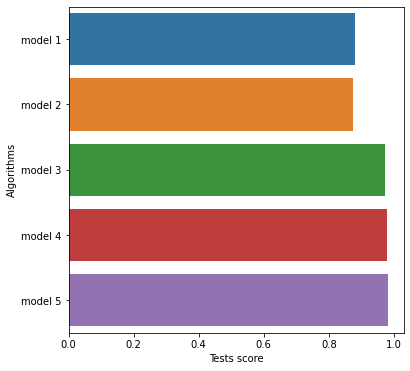

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(6,6))
sns.barplot(x = "Tests score", y = "Algorithms", data = compare_models)
plt.show()